In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import json
import pprint 
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score

In [5]:
# data = pd.read_csv("../../data/processed_dataset_comma.csv")
# data = pd.read_csv("../../data/processed_merged.csv")
data = pd.read_csv("../../data/ipmapping.csv")

In [6]:
data.head()

,No.,Time,Source,Destination,Source Mac Address,Detination Mac Address,Source Port,Destination Port,Protocol,Source IP,Destination IP,Source MAC,Destination MAC,Device Type1
0,2,0.003977,D-LinkIn_25:5b:0e,IntelCor_c3:41:79,D-LinkIn_25:5b:0e,IntelCor_c3:41:79,-1,0,3,631,274,b0:c5:54:25:5b:0e,28:b2:bd:c3:41:79,0
1,3,0.004079,IntelCor_c3:41:79,D-LinkIn_25:5b:0e,IntelCor_c3:41:79,D-LinkIn_25:5b:0e,-1,0,3,274,631,28:b2:bd:c3:41:79,b0:c5:54:25:5b:0e,0
2,4,0.008831,D-LinkIn_25:5b:0e,IntelCor_c3:41:79,D-LinkIn_25:5b:0e,IntelCor_c3:41:79,-1,0,3,631,274,b0:c5:54:25:5b:0e,28:b2:bd:c3:41:79,0
3,5,0.667925,192.168.0.20,224.0.0.251,D-LinkIn_25:5b:0e,IPv4mcast_fb,1,1,4,195,255,b0:c5:54:25:5b:0e,01:00:5e:00:00:fb,0
4,6,0.667951,192.168.0.20,224.0.0.251,D-LinkIn_25:5b:0e,IPv4mcast_fb,1,1,4,195,255,b0:c5:54:25:5b:0e,01:00:5e:00:00:fb,0


In [9]:
df = pd.DataFrame()
df["source_port"] = data["Source Port"]
df["destination_port"] = data["Destination Port"]
df["source_ip"] = data["Source IP"]
df["destination_ip"] = data["Destination IP"]
df["device_type"] = data["Device Type1"]

In [11]:
#data.dtypes
df.dtypes

source_port         int64
destination_port    int64
source_ip           int64
destination_ip      int64
device_type         int64
dtype: object

In [130]:
data = data.convert_objects(convert_numeric=True)

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


In [131]:
data = data.dropna(axis=0, how='any')

In [132]:
any(data.isnull())

True

In [133]:
data.dtypes

Source Port         int64
Destination Port    int64
Protocol            int64
Packet              int64
dtype: object

In [134]:
data = data.dropna()

In [12]:
corr = data.corr()

In [13]:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

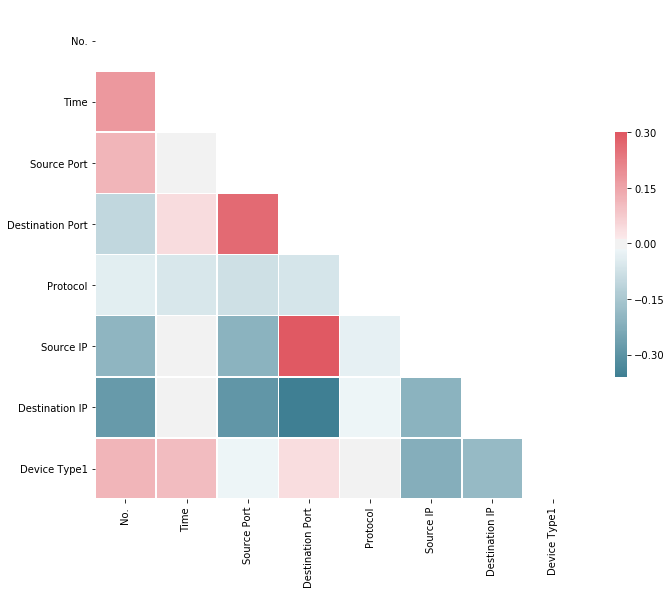

In [14]:
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [26]:
train, test = np.split(df.sample(frac=1), [int(.8*len(df))])

In [27]:
# X = ["Length", "Source Port", "Destination Port", "Protocol Index"]
X = [df.columns[0],df.columns[1],df.columns[2],df.columns[3]]
y= df.columns[4]

In [28]:
kmeans = KMeans(n_clusters=2, random_state = 0).fit(train[X])

In [29]:
kmeans.labels_[::10]

array([1, 0, 1, ..., 0, 1, 1], dtype=int32)

In [30]:
y_out = kmeans.predict(test[X])

In [31]:
y_true = test[y]

In [32]:
accuracy_score(y_true, y_out)

0.0091266352965510104

In [33]:
precision_recall_fscore_support(y_true, y_out, average='macro')

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


(0.00060676892992396296, 0.024856186700062878, 0.0010980839911256986, None)

In [125]:
kmeans.cluster_centers_

array([[  0.00000000e+00],
       [  0.00000000e+00],
       [  6.00000000e+00],
       [ -1.68531855e-13],
       [  3.00000000e+00],
       [  9.00000000e+00],
       [  1.50000000e+01],
       [  1.10000000e+01],
       [  1.50000000e+01],
       [  2.00000000e+00],
       [  1.20000000e+01],
       [  0.00000000e+00],
       [  0.00000000e+00],
       [  1.50000000e+01],
       [  0.00000000e+00],
       [  0.00000000e+00],
       [  3.00000000e+00],
       [  0.00000000e+00],
       [  5.00000000e+00],
       [  5.00000000e+00],
       [  0.00000000e+00],
       [  1.50000000e+01],
       [  0.00000000e+00],
       [  4.00000000e+00],
       [  4.00000000e+00],
       [  0.00000000e+00],
       [ -1.00000000e+00],
       [ -1.00000000e+00],
       [  0.00000000e+00],
       [  0.00000000e+00]])

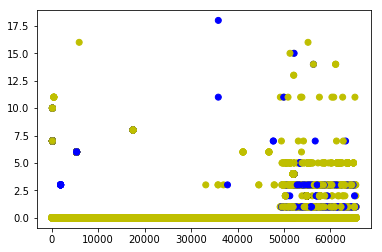

In [74]:
LABEL_COLOR_MAP = {0 : 'b',
                   1 : 'y'
                   }
x = test["Source Port"]
y = test["Protocol Index"]
label_color = [LABEL_COLOR_MAP[l] for l in test["Class"]]
plt.scatter(x, y, c=label_color)